# Influence of Inflation on Interest in Public Banks

    About Data:
      *The central bank's own data are used.
      *Two different data were used (Interest and Inflation)
      *No null value in inflation data.
      *"1 Year and Longer Term Interest" columns in 2005-2011 null
      *Inflation and interest data were combined from different tables.
       

### About Project
    In this project, web scraping, Linear Regression, Validation, CV, Regularization topic are used.
    Using the effect of inflation on interest rates, I analyzed annual interest rates.
    

### Columns Information
    Date            :  Date   
    TP_EUR_MT01_K   :  Interest rate 1 Month term € 
    TP_EUR_MT02_K   :  Interest rate 3 Months term € 
    TP_EUR_MT03_K   :  Interest rate 6 Months term €
    TP_EUR_MT04_K   :  Interest rate 1 Year term €
    TP_EUR_MT05_K   :  Interest rate 1 Year or long term € 
    TP_TRY_MT01_K   :  Interest rate 1 Month term Turkish lira
    TP_TRY_MT02_K   :  Interest rate 3 Month term Turkish lira
    TP_TRY_MT03_K   :  Interest rate 6 Month term Turkish lira
    TP_TRY_MT04_K   :  Interest rate 1 year term Turkish lira
    TP_TRY_MT05_K   :  Interest rate 1 year or long term Turkish lira
    TP_USD_MT01_K   :  Interest rate 1 Month term USD
    TP_USD_MT02_K   :  Interest rate 3 Month term USD
    TP_USD_MT03_K   :  Interest rate 6 Month term USD
    TP_USD_MT04_K   :  Interest rate 1 Year term USD
    TP_USD_MT05_K   :  Interest rate 1 Year or long term USD
    Yıllık_Değişim  :  Annual inflation rate
    Aylık_Değişim   :  Monthly inflation rate


In [1198]:
# Let's start load data and basic EDA
# First libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup


interest = pd.read_csv('C:/Users/Deniz/Desktop/New Microsoft Excel Worksheet.csv')

url = 'https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Enflasyon+Verileri/Tuketici+Fiyatlari'
html = urlopen(url)
soup = BeautifulSoup(html,'lxml')

In [1199]:
rows = soup.findAll('tr')[1:]
Inflation = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]


for i in range(len(rows)):
    print(Inflation[i])   

['02-2020', '12.37', '0.35']
['01-2020', '12.15', '1.35']
['12-2019', '11.84', '0.74']
['11-2019', '10.56', '0.38']
['10-2019', '8.55', '2']
['09-2019', '9.26', '0.99']
['08-2019', '15.01', '0.86']
['07-2019', '16.65', '1.36']
['06-2019', '15.72', '0.03']
['05-2019', '18.71', '0.95']
['04-2019', '19.50', '1.69']
['03-2019', '19.71', '1.03']
['02-2019', '19.67', '0.16']
['01-2019', '20.35', '1.06']
['12-2018', '20.30', '-0.40']
['11-2018', '21.62', '-1.44']
['10-2018', '25.24', '2.67']
['09-2018', '24.52', '6.30']
['08-2018', '17.90', '2.30']
['07-2018', '15.85', '0.55']
['06-2018', '15.39', '2.61']
['05-2018', '12.15', '1.62']
['04-2018', '10.85', '1.87']
['03-2018', '10.23', '0.99']
['02-2018', '10.26', '0.73']
['01-2018', '10.35', '1.02']
['12-2017', '11.92', '0.69']
['11-2017', '12.98', '1.49']
['10-2017', '11.90', '2.08']
['09-2017', '11.20', '0.65']
['08-2017', '10.68', '0.52']
['07-2017', '9.79', '0.15']
['06-2017', '10.90', '-0.27']
['05-2017', '11.72', '0.45']
['04-2017', '11.8

In [1200]:
colum = ['Date','Yıllık_Değişim','Aylık_Değişim']
inf = pd.DataFrame(Inflation, columns=colum)

In [1055]:
inf.head()

,Date,Yıllık_Değişim,Aylık_Değişim
0,02-2020,12.37,0.35
1,01-2020,12.15,1.35
2,12-2019,11.84,0.74
3,11-2019,10.56,0.38
4,10-2019,8.55,2


In [1056]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
Date              182 non-null object
Yıllık_Değişim    182 non-null object
Aylık_Değişim     182 non-null object
dtypes: object(3)
memory usage: 4.4+ KB


In [1057]:
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
Tarih            230 non-null object
TP EUR MT01 K    230 non-null float64
TP EUR MT02 K    230 non-null float64
TP EUR MT03 K    230 non-null float64
TP EUR MT04 K    230 non-null float64
TP EUR MT05 K    98 non-null float64
TP TRY MT01 K    230 non-null float64
TP TRY MT02 K    230 non-null float64
TP TRY MT03 K    230 non-null float64
TP TRY MT04 K    230 non-null float64
TP TRY MT05 K    98 non-null float64
TP USD MT01 K    230 non-null float64
TP USD MT02 K    230 non-null float64
TP USD MT03 K    230 non-null float64
TP USD MT04 K    230 non-null float64
TP USD MT05 K    98 non-null float64
dtypes: float64(15), object(1)
memory usage: 31.4+ KB


### We have to fix the types of inflation columns. 

In [1201]:
inf['Aylık_Değişim']= inf['Aylık_Değişim'].astype(float)
inf['Yıllık_Değişim']= inf['Yıllık_Değişim'].astype(float)
inf['Date']=pd.to_datetime(inf['Date'])

#### We will use the Date column to combine two sets of data, we also need to edit the names of the columns of the interest data set.


In [1202]:
interest.rename(columns={'Tarih': 'Date'},inplace=True)
interest['Date']=pd.to_datetime(interest['Date'])

interest.rename(columns={'TP EUR MT01 K': 'TP_EUR_MT01_K'},inplace=True)
interest.rename(columns={'TP EUR MT02 K': 'TP_EUR_MT02_K'},inplace=True)
interest.rename(columns={'TP EUR MT03 K': 'TP_EUR_MT03_K'},inplace=True)
interest.rename(columns={'TP EUR MT04 K': 'TP_EUR_MT04_K'},inplace=True)
interest.rename(columns={'TP EUR MT05 K': 'TP_EUR_MT05_K'},inplace=True)
interest.rename(columns={'TP TRY MT01 K': 'TP_TRY_MT01_K'},inplace=True)
interest.rename(columns={'TP TRY MT02 K': 'TP_TRY_MT02_K'},inplace=True)
interest.rename(columns={'TP TRY MT03 K': 'TP_TRY_MT03_K'},inplace=True)
interest.rename(columns={'TP TRY MT04 K': 'TP_TRY_MT04_K'},inplace=True)
interest.rename(columns={'TP TRY MT05 K': 'TP_TRY_MT05_K'},inplace=True)
interest.rename(columns={'TP USD MT01 K': 'TP_USD_MT01_K'},inplace=True)
interest.rename(columns={'TP USD MT02 K': 'TP_USD_MT02_K'},inplace=True)
interest.rename(columns={'TP USD MT03 K': 'TP_USD_MT03_K'},inplace=True)
interest.rename(columns={'TP USD MT04 K': 'TP_USD_MT04_K'},inplace=True)
interest.rename(columns={'TP USD MT05 K': 'TP_USD_MT05_K'},inplace=True)

In [27]:
#interest = interest.dropna(how='any')

In [1203]:
interest = interest.merge(inf,on='Date')
interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 18 columns):
Date              181 non-null datetime64[ns]
TP_EUR_MT01_K     181 non-null float64
TP_EUR_MT02_K     181 non-null float64
TP_EUR_MT03_K     181 non-null float64
TP_EUR_MT04_K     181 non-null float64
TP_EUR_MT05_K     98 non-null float64
TP_TRY_MT01_K     181 non-null float64
TP_TRY_MT02_K     181 non-null float64
TP_TRY_MT03_K     181 non-null float64
TP_TRY_MT04_K     181 non-null float64
TP_TRY_MT05_K     98 non-null float64
TP_USD_MT01_K     181 non-null float64
TP_USD_MT02_K     181 non-null float64
TP_USD_MT03_K     181 non-null float64
TP_USD_MT04_K     181 non-null float64
TP_USD_MT05_K     98 non-null float64
Yıllık_Değişim    181 non-null float64
Aylık_Değişim     181 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 26.9 KB


In [1061]:
interest.tail(3)

,Date,TP_EUR_MT01_K,TP_EUR_MT02_K,TP_EUR_MT03_K,TP_EUR_MT04_K,TP_EUR_MT05_K,TP_TRY_MT01_K,TP_TRY_MT02_K,TP_TRY_MT03_K,TP_TRY_MT04_K,TP_TRY_MT05_K,TP_USD_MT01_K,TP_USD_MT02_K,TP_USD_MT03_K,TP_USD_MT04_K,TP_USD_MT05_K,Yıllık_Değişim,Aylık_Değişim
178,2005-03-01,3.5,3.75,4.0,4.00,NaN,36.0,20.0,19.65,22.0,NaN,3.75,4.0,4.05,4.1,NaN,7.94,0.26
179,2005-02-01,3.6,4.25,4.0,4.25,NaN,20.5,20.5,20.50,24.0,NaN,3.76,4.0,3.75,4.0,NaN,8.69,0.02
180,2005-01-01,3.5,4.00,4.0,4.25,NaN,22.0,23.0,22.00,24.0,NaN,3.75,4.0,4.00,4.0,NaN,9.24,0.55


### Let's analyze the data a little

Let's look at public banks interest rates for 3 different currencies since 2019.

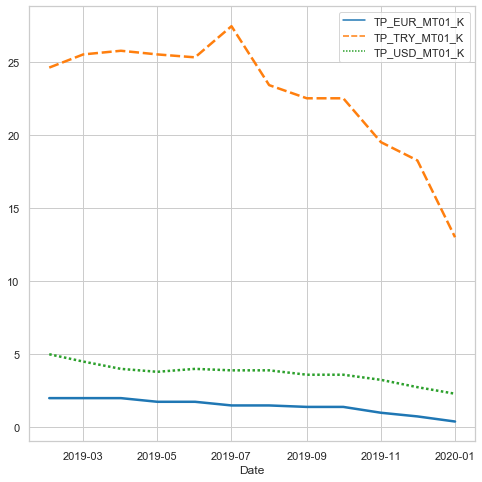

In [1062]:
res = interest[(interest.Date > '2019-01-01')].groupby('Date').max()[['TP_EUR_MT01_K','TP_TRY_MT01_K','TP_USD_MT01_K']]

sns.set(style="whitegrid")
plt.figure(figsize=(8,8))
sns.lineplot(data=res, palette="tab10", linewidth=2.5)


#### Inflation rate is higher than 20%

In [1008]:
interest[(interest.Yıllık_Değişim>20)][['Date','TP_EUR_MT01_K','TP_TRY_MT05_K','Yıllık_Değişim']]

,Date,TP_EUR_MT01_K,TP_TRY_MT05_K,Yıllık_Değişim
12,2019-01-01,3.50,23.25,20.35
13,2018-12-01,4.00,28.00,20.30
14,2018-11-01,4.00,28.00,21.62
15,2018-10-01,4.50,28.00,25.24
16,2018-09-01,5.75,28.75,24.52


### There is a conclusion that we can draw from this data, interest rates also seem to be high during periods of high inflation.
We can use this relationship when developing our ML model in the later stages.

## Is there a similarities between the Turkish lira interest rate and other currencies?
    Does the rate of interest in one affect the other?

In [1009]:
interest[['Date','TP_EUR_MT01_K','TP_EUR_MT02_K','TP_TRY_MT01_K','TP_USD_MT01_K']].sort_values(by='TP_EUR_MT01_K',ascending=False)

,Date,TP_EUR_MT01_K,TP_EUR_MT02_K,TP_TRY_MT01_K,TP_USD_MT01_K
134,2008-11-01,7.90,7.85,23.90,8.00
133,2008-12-01,7.75,7.75,23.15,8.00
132,2009-01-01,7.75,7.50,20.75,7.50
135,2008-10-01,7.50,8.05,22.35,8.00
136,2008-09-01,7.25,7.10,20.60,7.00
...,...,...,...,...,...
4,2019-09-01,1.40,1.20,22.50,3.60
3,2019-10-01,1.40,1.00,22.50,3.60
2,2019-11-01,1.00,0.95,19.50,3.25
1,2019-12-01,0.75,0.95,18.25,2.75


In [1263]:
interest[['Date','TP_TRY_MT05_K','TP_USD_MT05_K','Yıllık_Değişim']].sort_values(by='Date',ascending=True)

,Date,TP_TRY_MT05_K,TP_USD_MT05_K,Yıllık_Değişim
180,2005-01-01,NaN,1.972806,9.24
179,2005-02-01,NaN,1.972806,8.69
178,2005-03-01,NaN,1.972806,7.94
177,2005-04-01,NaN,1.972806,8.18
176,2005-05-01,NaN,1.972806,8.70
...,...,...,...,...
4,2019-09-01,15.85,3.250000,9.26
3,2019-10-01,14.10,3.100000,8.55
2,2019-11-01,12.60,2.750000,10.56
1,2019-12-01,11.60,2.500000,11.84


### Let's look at the corolation values ​​between the columns.

In [1181]:
interest.corr()['Yıllık_Değişim'].sort_values(ascending=False)

Yıllık_Değişim    1.000000
TP_TRY_MT05_K     0.935510
TP_TRY_MT02_K     0.665635
TP_TRY_MT03_K     0.647833
TP_TRY_MT01_K     0.646813
TP_TRY_MT04_K     0.640902
TP_USD_MT05_K     0.551534
TP_USD_MT03_K     0.345378
TP_USD_MT04_K     0.324247
TP_USD_MT02_K     0.291467
Aylık_Değişim     0.273346
TP_USD_MT01_K     0.265490
TP_EUR_MT01_K    -0.042536
TP_EUR_MT02_K    -0.063572
TP_EUR_MT03_K    -0.179917
TP_EUR_MT05_K    -0.231086
TP_EUR_MT04_K    -0.254013
Name: Yıllık_Değişim, dtype: float64

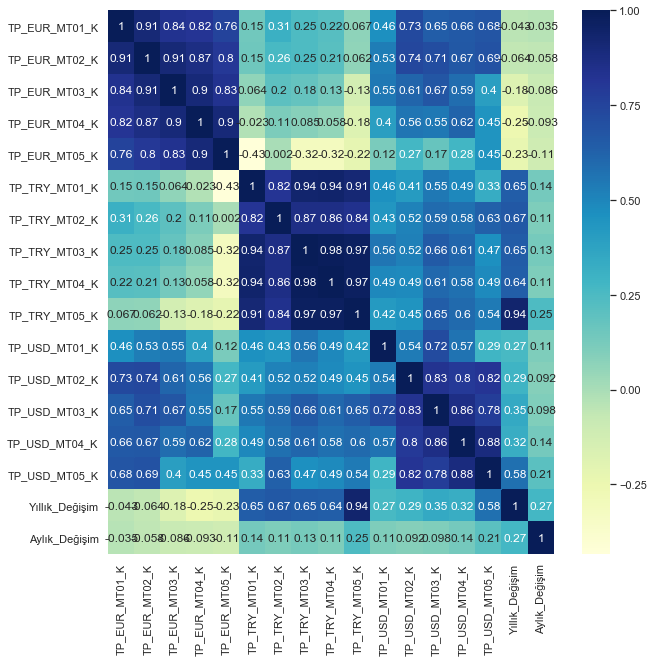

In [1012]:
plt.figure(figsize=(10,10))
sns.heatmap(interest.corr(), cmap="YlGnBu", annot = True)

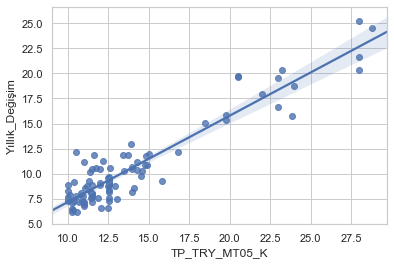

In [896]:
sns.regplot(x="TP_TRY_MT05_K", y="Yıllık_Değişim", data=interest);

#### Let's apply a small process for columns with NaN values.

In [819]:
tr = np.mean((interest.TP_TRY_MT05_K))
euro = round(interest.TP_EUR_MT01_K)
yıl = np.mean(interest.Yıllık_Değişim)
usd = np.mean((interest.TP_USD_MT05_K)/2)
yıl = np.mean(interest.Yıllık_Değişim)
#tr = round(tr,2)
#tr
#usd = round(usd,2)
interest.TP_USD_MT05_K.fillna(usd,inplace=True)
#interest.TP_TRY_MT05_K.fillna(tr,inplace=True)

Let's put it into an ML model in the simplest way, without making any changes on the columns.

In [1205]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import patsy

In [1206]:
y,x = patsy.dmatrices('Yıllık_Değişim ~ TP_TRY_MT05_K + TP_TRY_MT02_K + TP_TRY_MT03_K + TP_TRY_MT01_K + TP_TRY_MT04_K'  ,data=interest, return_type="dataframe")

ml = sm.OLS(y,x)
model = ml.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Yıllık_Değişim   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.81e-43
Time:                        11:26:18   Log-Likelihood:                -168.97
No. Observations:                  98   AIC:                             349.9
Df Residuals:                      92   BIC:                             365.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.3428      0.563     -4.164      0.000      -3.460      -1.225
TP_TRY_MT05_K     0.4249      0.162      2.628      0.010       0.104       0.746
TP_TRY_MT02_K     0.1752      0.061      2.851      0.005       0.053       0.297
TP_TRY_MT03_K     0.0374      0.186      0.200      0.842      -0.333       0.408
TP_TRY_MT01_K     0.1057      0.084      1.257      0.212      -0.061       0.273
TP_TRY_MT04_K     0.1453      0.191      0.759      0.450      -0.235       0.526
==============================================================================
Omnibus:                        6.024   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.445
Skew:                           0.201   Prob(JB):                       0.0147
Kurtosis:                       4.381   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Also we can do with sklearn

In [1207]:
ml_2 = LinearRegression()
model_2 = ml_2.fit(x,y)
model_2.score(x,y)

0.8924804508713866

### Oh, not bad for the first time. This model can definitely develop more!
### This ML model is very, very simple, because we train and test all the data. This is a process we will not do most of the time.
    The following should be considered, we put all columns on ML and did not apply validation, CV or regularization

### From this stage on, we will work to improve the model and increase the r^2 score value.

In [1208]:
# As a result of the corr () above, we have seen that the EURO columns are ineffective. 
# Let's repeat our model without including these columns
# I use from sklearn.model_selection import train_test_split library for train and test some of the data

from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame

y1 ,x1 = patsy.dmatrices('Yıllık_Değişim ~ TP_TRY_MT05_K + TP_TRY_MT02_K + TP_TRY_MT03_K + TP_TRY_MT01_K + TP_TRY_MT04_K' ,data=interest, return_type="dataframe")


x_train , x_test, y_train, y_test = train_test_split(x1,y1, test_size=.2, random_state=10)

model_ = LinearRegression()

model_.fit(x_train,y_train)

pred_ = model_.predict(x_test)
mins = np.mean((pred_ - y_test)**2)

print('Model r^2 :' ,model_.score(x_test,y_test))
print('MSE : ' , mins)

#model_.coef_



Model r^2 : 0.849929625852405
MSE :  Yıllık_Değişim    1.849944
dtype: float64


Trying different linear models can increase the value of r'2. Which model is better, we need to find out.

In [1209]:
# Let's import the necessary modules for Ridge and polynomial regression.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_train, y_train, test_size=.25, random_state=10)

# Lineer Regression # 

lineer_model = LinearRegression()
lineer_model.fit(X_train_val,y_train_val)
# ----------------- #

# Ridge Regression #
ridge = StandardScaler()

X_train_scaled   = ridge.fit_transform(X_train_val.values)
X_val_scaled     = ridge.transform(X_test_val.values)
X_test_scaled    = ridge.transform(x_test.values)

ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train_scaled,y_train_val)
# ------------------ #

# Lasso Regression #
las = StandardScaler()

X_train_las_scaled   = las.fit_transform(X_train_val.values)
X_val_las_scaled     = las.transform(X_test_val.values)
X_test_las_scaled    = las.transform(x_test.values)

lasso = Lasso(alpha=0.02,normalize=True)
lasso.fit(X_train_las_scaled,y_train_val)


# ----------------- #

# Pollynomial Regression #
poly = PolynomialFeatures(degree=1) 

X_train_poly = poly.fit_transform(X_train_val.values)
X_val_poly = poly.transform(X_test_val.values)
X_test_poly = poly.transform(x_test.values)

model_polly = LinearRegression()
model_polly.fit(X_train_poly,y_train_val)


# -------------------- #

# Print r'2 each model #

print(f'Linear Regression val R^2: {lineer_model.score(X_test_val, y_test_val):.3f}')
print(f'Alpha=5 Ridge Regression val R^2: {ridge_model.score(X_val_scaled, y_test_val):.3f}')
print(f'Degree 1 polynomial regression val R^2: {model_polly.score(X_val_poly, y_test_val):.3f}')
print('Lasso Regression R^2 : ', lasso.score(X_val_las_scaled,y_test_val))

Linear Regression val R^2: 0.898
Alpha=5 Ridge Regression val R^2: 0.894
Degree 1 polynomial regression val R^2: 0.898
Lasso Regression R^2 :  0.8964253938452634


## All results are very close, however, there is an issue to be considered; y_test contains small data.

I think Lineer Regression is the best this dataset.

In [1169]:
model_best = LinearRegression()
model_best.fit(x_train,y_train)

print("Lineer Model Score : ",model_best.score(x_test,y_test))
pred = model_best.predict(x_test)
print(np.mean((pred - y_test)**2))



Lineer Model Score :  0.849929625852405
Yıllık_Değişim    1.849944
dtype: float64


Ups :(   
Model score is down. Add a few more columns that affect Dep Variable in corr ().
USD-5-4-3-2-1

In [1257]:
y1 ,x1 = patsy.dmatrices('Yıllık_Değişim ~ TP_TRY_MT05_K + TP_TRY_MT02_K + TP_TRY_MT03_K + TP_TRY_MT01_K + TP_TRY_MT04_K+TP_USD_MT05_K+TP_USD_MT03_K+TP_USD_MT04_K+TP_USD_MT01_K+TP_USD_MT02_K' ,data=interest, return_type="dataframe")
x_train , x_test, y_train, y_test = train_test_split(x1,y1, test_size=.2, random_state=10)
model_best.fit(x_train,y_train)
print("Lineer Regression Score : ",model_best.score(x_test,y_test))

Lineer Regression Score :  0.8863496880219517


#### I have a NaN values on _MT05_K columns. This made a problem. 

In [1260]:
interest.corr()['Yıllık_Değişim'].sort_values(ascending=False)

Yıllık_Değişim    1.000000
TP_TRY_MT05_K     0.935510
TP_TRY_MT02_K     0.665635
TP_TRY_MT03_K     0.647833
TP_TRY_MT01_K     0.646813
TP_TRY_MT04_K     0.640902
TP_USD_MT05_K     0.551685
TP_USD_MT03_K     0.345378
TP_USD_MT04_K     0.324247
Aylık_Değişim     0.297567
TP_USD_MT02_K     0.291467
TP_USD_MT01_K     0.265490
TP_EUR_MT01_K    -0.042536
TP_EUR_MT02_K    -0.063572
TP_EUR_MT03_K    -0.179917
TP_EUR_MT05_K    -0.231086
TP_EUR_MT04_K    -0.254013
Name: Yıllık_Değişim, dtype: float64

##### I think that the "Aylık_Değişim" column will affect the prediction column.

In [1259]:
interest['Aylık_Değişim'] = round(interest.Aylık_Değişim)

#run model again, you'll be see the score changed.